In [755]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import os
# print(os.getcwd())
# # os.chdir("../")
# print(os.getcwd())
from technical_indicator import moving_average as ma
import matplotlib.pyplot as plt

In [756]:
import yfinance as yf
import pandas as pd
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
ticker = "YESBANK.NS"
df = yf.download(ticker,period="10y",interval="1d")
df.dropna(inplace=True) # drop NA value from data frame

[*********************100%***********************]  1 of 1 completed


In [757]:
# Call ema function that Calculate 50-days, 200-days EMA
days=[50,200]
for i in days:
    ma.ema(df, days=i)

In [758]:
# Condition to match EMA cross over early stage of stock movement
# 1. 50-days EMA > 200-days EMA
# 2. Current Closing Price > 50-days EMA
# 3. 50-days EMA should not be too far from 200-days EMA.(50-days EMA < 5% of 200-days EMA)
# 4. Current closing price should not be too far from 50-days EMA. (Closing Price < 2% of 5-days EMA)

# save result in new data frame: result_df

result_df = df.loc[(df['50days_ema'] > df['200days_ema']) & 
                   (df['50days_ema'] < df['200days_ema']*1.05) &
                 (df['Close'] > df['50days_ema']) &
                    (df['Close'] < df['50days_ema']*(1.02))]

In [759]:
# Condition to match EMA cross over early stage of stock movement
# 1. 50-days EMA > 150-days EMA > 200-days EMA
# 2. Current Closing Price > 50-days EMA
# 3. 50-days EMA should not be too far from 150-days EMA.(50-days EMA < 2% of 150-days EMA)
# 4. Current closing price should not be too far from 50-days EMA. (Closing Price < 2% of 5-days EMA)

# save result in new data frame: result_df

# result_df = df.loc[(df['150days_ema'] > df['200days_ema']) & (df['50days_ema'] > df['150days_ema']) & 
#                    (df['50days_ema'] < df['150days_ema']*1.02) &
#                  (df['Close'] > df['50days_ema']) &
#                     (df['Close'] < df['50days_ema']*(1.02))]


In [760]:
# Create new Empty DataFrame that calculate 1 year return

result_1_year = pd.DataFrame()
result_1_year['Current_Close_Price'] = np.nan # Current Closing Price from result_df data frame
result_1_year['After_1year_Closing_Price'] = np.nan # Closing Price After 1 year from "Current Closing Price"

In [761]:
# Adding data to result_1_year datafame

for i in range(len(result_df.index)):
    result_1_year['Current_Close_Price'] = result_df['Close']
    try:
        result_1_year['After_1year_Closing_Price'][i] = df[df.index == (result_df.index[i] + timedelta(365))]['Close'][0]
    except Exception as e:
        print("Excepton", e) 

Excepton index 0 is out of bounds for axis 0 with size 0
Excepton index 0 is out of bounds for axis 0 with size 0
Excepton index 0 is out of bounds for axis 0 with size 0
Excepton index 0 is out of bounds for axis 0 with size 0
Excepton index 0 is out of bounds for axis 0 with size 0
Excepton index 0 is out of bounds for axis 0 with size 0


In [749]:
# Calculate % of profit/loss in 1 year

result_1_year['gain_or_loss'] = ((result_1_year['After_1year_Closing_Price'] - result_1_year['Current_Close_Price'])
        /result_1_year['Current_Close_Price'])*100

In [750]:
# Saving Result to Excel sheet

# result_1_year.to_excel("result_{}.xlsx".format(ticker))

In [751]:
# rslt_df_after_2010 = rslt_df.loc[rslt_df['years'] > 2010]
# rslt_df_after_2015

In [752]:
# import datetime as dt

# df['years'] =  df.index.year
# df.tail()
# df_new = df.groupby('years')
# type(df_new)
# df_new.size()
# years = list(set(dates))
# years
# x = [dt.datetime(d,'%m/%d/%Y').date() for d in dates]
# dates[0].year
# y = range(len(dates))
result_1_year['year'] = result_1_year.index.year
result_new = result_1_year.groupby('year', as_index=False).aggregate({'gain_or_loss': ["mean","max", "min"]})

In [753]:
# result_1_year.groupby(['year']).groups.keys()
result_new

year gain_or_loss              
                mean    max    min
0  2012        31.18  48.63   6.21
1  2013         6.06   7.21   4.91
2  2018       -61.11 -47.91 -71.32

Text(0, 0.5, 'percent of gain_or_loss')

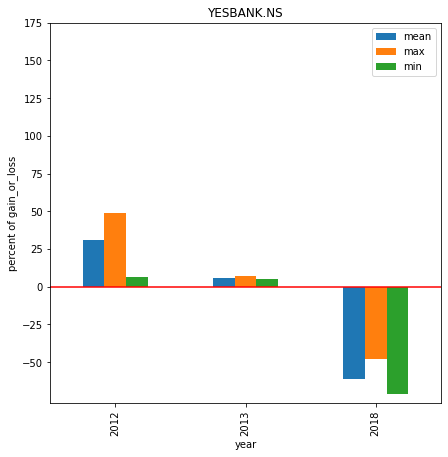

In [754]:
#bar plot of above result
plt.rcParams["figure.figsize"] = [7,7]
result_new.plot(x="year", y='gain_or_loss', kind="bar", yticks=list(range(-50,200,25)))
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title(ticker)
plt.ylabel("percent of gain_or_loss")

In [682]:
# plt.rcParams["figure.figsize"] = [15,7]
# plt.axhline(y=0.0, color='r', linestyle='-')
# plt.plot(df.index, df["difference(30days_ema-40days_ema)"])
# plt.plot(df.index, df["30days_ema"])
# plt.plot(df.index, df["40days_ema"])

# plt.hist(years, df["difference(30days_ema-40days_ema)"], histtype='bar', rwidth=1)